In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.font_manager as fm
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('../파생변수데이터셋/외감_파생_ir.csv',index_col=0)

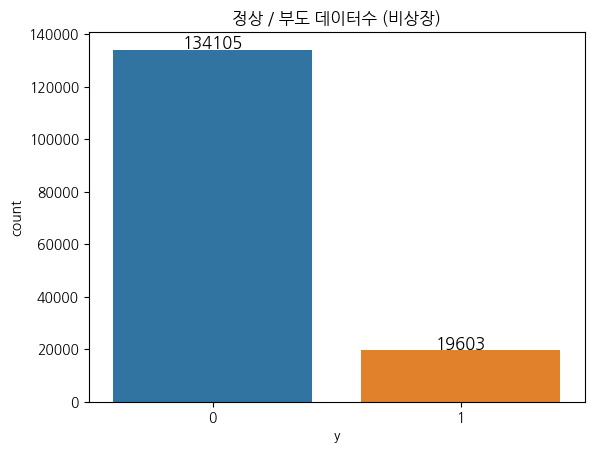

In [3]:
import seaborn as sns

ax = sns.countplot(x="y", data=df[['y']])
plt.title("정상 / 부도 데이터수 (비상장)")

# 각 막대 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.show()

In [4]:
qq_columns = ['총자본증가율', '유형자산증가율', '유동자산증가율', '순이익증가율', 
'자기자본증가율', '매출액증가율', '비유동자산증가율',

'매출액순이익률','총자본순이익률', '자기자본순이익률', '자본금영업이익률', '자본금순이익률', '유보율',

'자기자본회전률', '타인자본회전률','총자본회전률', '운전자본회전률',
'유동자산회전률', '당좌자산회전률', '매출채권회전률','비유동자산회전률','자본금회전률',

'부채비율', '유동비율', '이자보상배율', '차입금의존도', '자기자본구성비율', '순운전자본비율','비유동비율','영업이익대비이자보상배율',

'자본분배율', '이윤분배율', '총자본투자효율', '부가가치율',

'log총자산',"총부채대비영업현금흐름","매출액대비영업현금흐름","총자산대비영업현금흐름"]


### 결측치 삭제

In [5]:
# 데이터프레임에서 INF 값 찾기
inf_mask = df.isin([np.inf, -np.inf])[df['y']==1]

# INF 값이 포함된 행과 열의 위치를 찾기
inf_locations = inf_mask.stack()[inf_mask.stack()].index.tolist()

In [6]:
len(inf_locations)

0

In [7]:
df[qq_columns].isna().sum()

총자본증가율          0
유형자산증가율         0
유동자산증가율         0
순이익증가율          0
자기자본증가율         0
매출액증가율          0
비유동자산증가율        0
매출액순이익률         0
총자본순이익률         0
자기자본순이익률        0
자본금영업이익률        0
자본금순이익률         0
유보율             0
자기자본회전률         0
타인자본회전률         0
총자본회전률          0
운전자본회전률         0
유동자산회전률         0
당좌자산회전률         0
매출채권회전률         0
비유동자산회전률        0
자본금회전률          0
부채비율            0
유동비율            0
이자보상배율          0
차입금의존도          0
자기자본구성비율        0
순운전자본비율         0
비유동비율           0
영업이익대비이자보상배율    0
자본분배율           0
이윤분배율           0
총자본투자효율         0
부가가치율           0
log총자산          0
총부채대비영업현금흐름     0
매출액대비영업현금흐름     0
총자산대비영업현금흐름     0
dtype: int64

In [8]:
df[qq_columns][df['y']==1].describe()

,총자본증가율,유형자산증가율,유동자산증가율,순이익증가율,자기자본증가율,매출액증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,비유동비율,영업이익대비이자보상배율,자본분배율,이윤분배율,총자본투자효율,부가가치율,log총자산,총부채대비영업현금흐름,매출액대비영업현금흐름,총자산대비영업현금흐름
count,19603.000000,1.960300e+04,1.960300e+04,1.960300e+04,1.960300e+04,1.960300e+04,1.960300e+04,1.960300e+04,19603.000000,19603.000000,...,1.960300e+04,19603.000000,19603.000000,19603.000000,1.960300e+04,1.960300e+04,19603.000000,19603.000000,19603.000000,19603.000000
mean,9.397465,1.048770e+04,5.912513e+02,-1.794683e+03,1.093273e+02,1.093959e+03,3.010539e+03,-1.493869e+03,-8.566588,1.059584,...,2.513151e+03,12.041141,2.903445,-124.665094,-2.001130e+03,-9.467142e+02,7.181832,0.044962,-1126.801455,-0.000615
std,122.084583,1.009401e+06,6.913712e+04,4.043525e+05,9.624421e+03,5.795490e+04,1.687519e+05,7.021530e+04,72.397383,614.538266,...,6.920099e+04,519.764595,662.853688,2498.895269,2.338810e+05,4.975616e+04,0.428824,0.912593,6400.653925,0.315894
min,-100.000000,-1.000000e+02,-1.000000e+02,-5.507960e+07,-1.299710e+03,-1.000000e+02,-1.000000e+02,-8.392717e+06,-8593.950000,-27389.920000,...,0.000000e+00,-7285.480000,-64995.980000,-208392.960000,-3.250258e+07,-5.959935e+06,1.462398,-22.373449,-23627.155498,-24.777496
25%,-11.910000,-8.785000e+00,-2.610500e+01,0.000000e+00,0.000000e+00,-1.232500e+01,-8.670000e+00,-2.273500e+01,-10.800000,0.000000,...,0.000000e+00,-1.790000,0.000000,0.000000,-7.500000e-01,0.000000e+00,6.997680,-0.064424,-0.126493,-0.058458
50%,0.000000,-3.400000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.040000,0.000000,...,6.338000e+01,0.000000,36.100000,0.000000,8.280000e+00,9.810000e+00,7.153204,0.005003,0.005083,0.004578
75%,16.735000,1.038000e+01,2.638500e+01,0.000000e+00,1.239000e+01,2.466000e+01,1.762500e+01,3.090000e+00,3.670000,11.725000,...,2.994950e+02,1.930000,67.480000,22.735000,1.863000e+01,2.218000e+01,7.338276,0.105523,0.097061,0.081011
max,12197.320000,1.380400e+08,9.673967e+06,1.204948e+07,1.343477e+06,7.341006e+06,1.667616e+07,7.036361e+04,422.740000,71000.240000,...,5.265915e+06,39831.630000,1004.890000,26418.150000,1.494280e+05,1.626157e+05,9.874312,94.290694,27701.187019,6.073543


In [9]:
df[qq_columns][df['y']==0].describe()

,총자본증가율,유형자산증가율,유동자산증가율,순이익증가율,자기자본증가율,매출액증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,비유동비율,영업이익대비이자보상배율,자본분배율,이윤분배율,총자본투자효율,부가가치율,log총자산,총부채대비영업현금흐름,매출액대비영업현금흐름,총자산대비영업현금흐름
count,134105.000000,1.341050e+05,1.341050e+05,1.341050e+05,1.341050e+05,1.341050e+05,1.341050e+05,1.341050e+05,134105.000000,134105.000000,...,1.341050e+05,1.341050e+05,134105.000000,1.341050e+05,134105.000000,1.341050e+05,134105.000000,134105.000000,134105.000000,134105.000000
mean,12.683798,2.770644e+04,3.375153e+02,2.812297e+02,1.025172e+02,2.727466e+02,5.508517e+02,-3.998211e+02,3.907318,12.357553,...,9.637921e+02,1.126138e+02,29.668982,-1.522243e+03,32.100684,2.327464e+02,7.530871,4.488180,-1183.519009,0.056004
std,1403.272998,4.612938e+06,9.725320e+04,2.627180e+04,1.165118e+04,2.133686e+04,1.393517e+05,1.152939e+05,12.841629,668.162648,...,1.552492e+05,3.092680e+04,1048.890477,5.406670e+05,1552.106884,6.086179e+04,0.457348,859.224477,11323.949961,0.149279
min,-99.940000,-1.000000e+02,-1.000000e+02,-2.121519e+04,-9.994000e+01,-1.000000e+02,-1.000000e+02,-4.127076e+07,-1821.050000,-5752.400000,...,0.000000e+00,-7.138938e+04,-200288.190000,-1.979755e+08,-31363.620000,-2.208638e+06,4.007364,-11280.915663,-107277.040000,-2.816995
25%,-3.590000,-5.100000e+00,-9.650000e+00,-1.685000e+01,-3.700000e-01,-8.300000e+00,-4.440000e+00,4.000000e-01,0.380000,1.040000,...,5.511000e+01,0.000000e+00,34.970000,3.210000e+00,7.430000,8.330000e+00,7.228759,-0.006344,-0.004439,-0.003206
50%,3.040000,-7.000000e-01,4.600000e+00,0.000000e+00,5.780000e+00,2.520000e+00,6.100000e-01,2.840000e+00,2.860000,6.770000,...,1.057200e+02,7.900000e-01,59.140000,2.097000e+01,13.330000,1.571000e+01,7.442279,0.087410,0.052296,0.046246
75%,13.290000,8.200000e+00,2.217000e+01,3.041000e+01,1.679000e+01,1.694000e+01,1.318000e+01,7.990000e+00,7.280000,15.900000,...,1.953200e+02,4.250000e+00,75.870000,4.142000e+01,21.280000,2.887000e+01,7.748833,0.262027,0.136634,0.109817
max,513178.820000,1.457295e+09,3.558364e+07,7.389689e+06,3.182429e+06,3.933564e+06,5.057970e+07,1.362216e+06,194.550000,212400.000000,...,4.000000e+07,1.130396e+07,1160.630000,1.017258e+05,345127.770000,2.132356e+07,10.839664,102416.435754,6100.773846,2.516550


### train_test_split

In [10]:
train = df[df['회계년도'] <= '2020-11-01']
test = df[df['회계년도'] >= '2020-11-01']

### winsorize

In [16]:
from scipy.stats.mstats import winsorize


# 데이터프레임의 각 열에 대해 winsorize를 적용
for col in qq_columns:
    # y == 1인 경우
    train.loc[train['y'] == 1, col] = winsorize(train.loc[train['y'] == 1, col], limits=[0.01, 0.01])
    test.loc[test['y'] == 1, col] = winsorize(test.loc[test['y'] == 1, col], limits=[0.01, 0.01])

    # y == 0인 경우
    train.loc[train['y'] == 0, col] = winsorize(train.loc[train['y'] == 0, col], limits=[0.01, 0.01])
    test.loc[test['y'] == 0, col] = winsorize(test.loc[test['y'] == 0, col], limits=[0.01, 0.01])

# 결과 확인
train[qq_columns].describe()



,총자본증가율,유형자산증가율,유동자산증가율,순이익증가율,자기자본증가율,매출액증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,비유동비율,영업이익대비이자보상배율,자본분배율,이윤분배율,총자본투자효율,부가가치율,log총자산,총부채대비영업현금흐름,매출액대비영업현금흐름,총자산대비영업현금흐름
count,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,...,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000,101635.000000
mean,6.055196,23.161324,13.322804,47.954023,14.708691,19.910724,16.895618,-11.060317,2.398172,6.974770,...,267.048177,6.556622,46.778888,2.635099,14.359834,16.078776,7.471867,0.167131,-1107.032168,0.050966
std,25.802676,142.372802,67.342125,217.193004,53.749606,150.577782,103.003094,179.727287,12.026207,30.769918,...,1022.677872,26.238368,49.652383,115.336406,20.573465,91.225844,0.429932,0.445142,10433.172465,0.130177
min,-90.660000,-98.130000,-95.710000,-95.730000,-94.780000,-91.440000,-96.800000,-4036.770000,-118.180000,-268.770000,...,0.000000,-78.640000,-487.890000,-1838.270000,-254.910000,-1932.130000,5.993832,-1.116258,-107277.040000,-0.768772
25%,-4.470000,-5.380000,-11.785000,-15.120000,0.000000,-9.140000,-4.770000,0.050000,0.070000,0.000000,...,50.000000,0.000000,32.230000,0.570000,6.740000,7.740000,7.178010,-0.010302,-0.008466,-0.005684
50%,2.250000,-0.750000,3.360000,0.000000,5.010000,1.170000,0.320000,2.470000,2.450000,6.060000,...,105.700000,0.760000,58.460000,18.370000,12.940000,15.270000,7.382056,0.077350,0.050841,0.043473
75%,12.520000,7.930000,20.830000,22.480000,15.920000,15.050000,12.820000,7.370000,6.720000,15.230000,...,206.530000,3.800000,75.450000,39.200000,20.620000,27.810000,7.683425,0.239715,0.136010,0.107172
max,187.810000,2215.020000,831.940000,1637.950000,616.420000,3127.300000,2122.420000,119.590000,36.380000,177.370000,...,20991.430000,206.100000,98.540000,93.250000,88.470000,175.200000,8.997554,2.479247,27701.187019,0.695253


# 스케일 전 박스플롯

### Standard, Minmax

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 스케일러 초기화
scaler = StandardScaler()

# 훈련 데이터에 대해 스케일러 학습 및 변환
train.loc[:,qq_columns] = scaler.fit_transform(train[qq_columns])

# 테스트 데이터 변환 (훈련 데이터로부터 학습된 파라미터 사용)
test.loc[:,qq_columns] = scaler.transform(test[qq_columns])

'자본분배율', '부가가치율', '유동비율', '자기자본구성비율', 'CASH FLOW 대 매출액비율', 'CASH FLOW 대 부채비율', '타인자본회전률', '총자본순이익률', '차입금의존도', '비유동자산회전률', '비유동자산증가율'

In [20]:
train[train['y']==1][[qq_columns]].describe()

KeyError: "['EBITDA(백만원)', '시장자기자본순이익률'] not in index"

In [69]:
train[train['y']==0][qq_columns].describe()

,총자본증가율,유형자산증가율,유동자산증가율,순이익증가율,자기자본증가율,매출액증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,비유동비율,영업이익대비이자보상배율,자본분배율,이윤분배율,총자본투자효율,부가가치율,log총자산,총부채대비영업현금흐름,매출액대비영업현금흐름,총자산대비영업현금흐름
count,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,...,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000,88231.000000
mean,0.000580,0.000036,0.000459,0.001049,-0.003072,-0.003906,-0.000633,0.000849,0.052947,0.005783,...,-0.012901,0.000563,0.004489,0.001581,0.003553,0.002364,0.099077,0.000638,-0.001794,0.040314
std,1.072780,1.055564,1.073257,1.072669,0.344492,0.697012,1.038346,1.047894,0.414247,0.970177,...,0.070573,1.073274,1.023676,1.064550,0.011883,1.028346,0.972432,1.073280,1.048910,0.882919
min,-0.069920,-0.005294,-0.004585,-0.716918,-0.033774,-0.015609,-0.005678,-304.777422,-57.294047,-16.838043,...,-0.023458,-2.013837,-213.036199,-310.834766,-0.302989,-4.490853,-5.733697,-13.922355,-10.169652,-15.667231
25%,-0.010405,-0.005255,-0.003781,-0.010557,-0.011362,-0.012771,-0.005097,0.005105,-0.054798,-0.023530,...,-0.020880,-0.003848,0.008420,0.007366,0.003362,-0.002297,-0.559836,-0.004260,0.103838,-0.321825
50%,-0.006460,-0.005253,-0.003656,-0.009929,-0.010045,-0.012455,-0.005067,0.005123,0.020621,-0.007106,...,-0.018559,-0.003821,0.033641,0.009417,0.003419,-0.002196,-0.109867,-0.004147,0.103843,-0.021147
75%,-0.000436,-0.005250,-0.003507,-0.008982,-0.007689,-0.012055,-0.004994,0.005161,0.153860,0.018670,...,-0.014441,-0.003730,0.051714,0.011817,0.003492,-0.002021,0.551003,-0.003934,0.103851,0.365394
max,318.335208,300.391476,318.671507,246.248748,87.909903,122.345146,306.976655,10.065004,6.044995,271.562271,...,8.658841,318.262440,0.538052,12.251082,1.604466,294.188852,7.256755,126.354434,0.688085,12.747135


In [70]:
train.apply(lambda x: (x == 0).sum())

회사명                             0
거래소코드                           0
회계년도                            0
통계청 한국표준산업분류 코드 10차(대분류)        0
매출액순이익률                         0
총자본순이익률                         0
자기자본순이익률                        0
자본금영업이익률                        0
자본금순이익률                         0
유보율                             0
자기자본회전률                         0
타인자본회전률                         0
총자본회전률                          0
운전자본회전률                         0
유동자산회전률                         0
당좌자산회전률                         0
매출채권회전률                         0
비유동자산회전률                        0
자본금회전률                          0
부채비율                            0
유동비율                            0
이자보상배율                          0
차입금의존도                          0
자기자본구성비율                        0
순운전자본비율                         0
비유동비율                           0
영업이익대비이자보상배율                    0
자본분배율                           0
이윤분배율                           0
총자본투자효율       

C:\Users\hotte\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


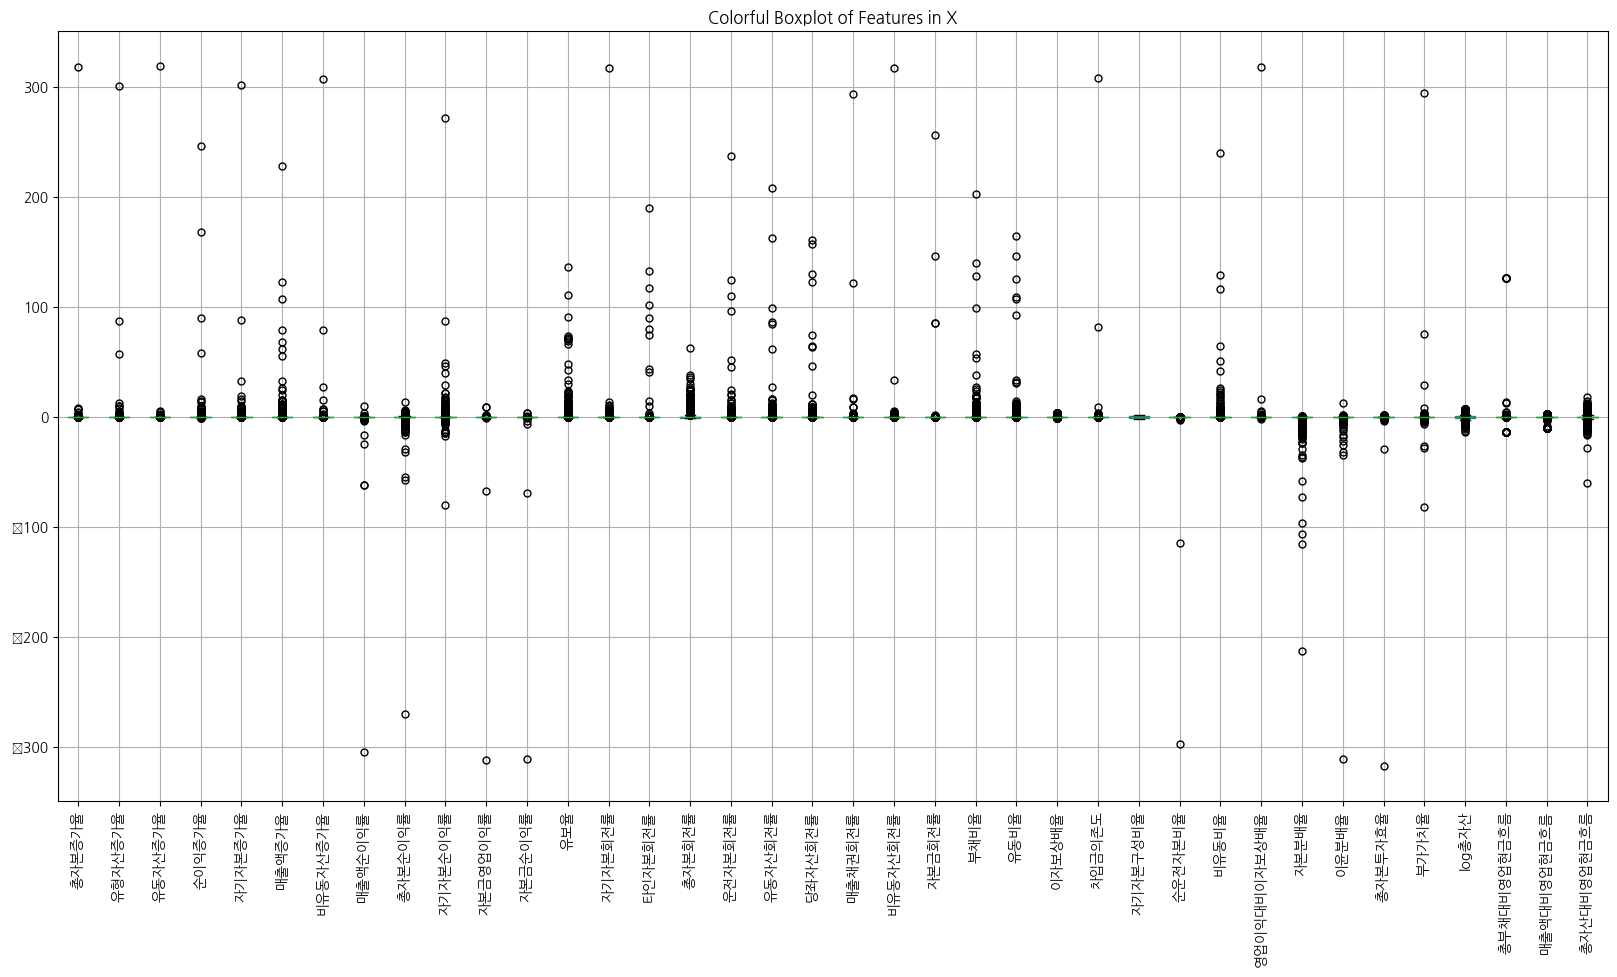

In [71]:
# Plotting the boxplots with a color scheme
plt.figure(figsize=(20, 10))
train[qq_columns].boxplot(rot=90, patch_artist=True, showfliers=True, flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Colorful Boxplot of Features in X')
plt.show()

# 5. Feature_Selection

In [72]:
# X_y 분류
y_train = train['y']
X_train = train[qq_columns]

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()


logit = SelectFromModel(LogisticRegression())
logit.fit(X_train, y_train)
logit_support = logit.get_support()
lr_feature = X_train.loc[:,logit_support].columns.tolist()
len(lr_feature)

c:\Users\hotte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10

### LASSO

In [74]:

from sklearn.linear_model import Lasso

# 라쏘 모델 생성 및 훈련
lasso = Lasso(alpha=0.001)  # alpha 값은 조정이 필요할 수 있음
lasso.fit(X_train, y_train)

# 사용된 피처의 인덱스 확인
selected_feature_indices = np.where(lasso.coef_ != 0)[0]

# 인덱스를 사용하여 컬럼명 추출
selected_features_lasso = X_train.columns[selected_feature_indices]

print("Selected features based on Lasso:", selected_features_lasso)

Selected features based on Lasso: Index(['순이익증가율', '자기자본증가율', '매출액증가율', '총자본순이익률', '자기자본순이익률', '유보율', '자기자본회전률',
       '총자본회전률', '운전자본회전률', '비유동자산회전률', '자본금회전률', '부채비율', '이자보상배율', '자기자본구성비율',
       '비유동비율', '자본분배율', '이윤분배율', 'log총자산', '총부채대비영업현금흐름', '총자산대비영업현금흐름'],
      dtype='object')


### T-test
'총자본증가율', '유동자산증가율', '비유동자산증가율', '매출액순이익률', '총자본순이익률', '자본금순이익률', '총자본회전률', '운전자본회전률', '비유동자산회전률', '자본금회전률', '이자보상배율', '차입금의존도', '자기자본구성비율', '순운전자본비율', '총자본투자효율', '부가가치율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 매출액비율'

In [75]:
from scipy.stats import ttest_ind

# 타겟 변수에 따라 데이터를 분할
group1 = train[train['y'] == 0]
group2 = train[train['y'] == 1]

# 각 피처에 대해 t-test 수행
selected_features_ttest = []
for feature in qq_columns:
    stat, p_value = ttest_ind(group1[feature], group2[feature])
    if p_value < 0.05:  # p-value 임계값 설정
        selected_features_ttest.append(feature)

# 선택된 피처 출력
print("Selected features based on t-test:", selected_features_ttest)


Selected features based on t-test: ['자기자본증가율', '매출액증가율', '총자본순이익률', '자기자본순이익률', '자본금영업이익률', '자본금순이익률', '유보율', '총자본회전률', '운전자본회전률', '비유동자산회전률', '자본금회전률', '부채비율', '이자보상배율', '차입금의존도', '자기자본구성비율', '순운전자본비율', '비유동비율', '자본분배율', '총자본투자효율', 'log총자산', '총자산대비영업현금흐름']


# Stepwise, Forward, Backward

In [76]:
import statsmodels.api as sm
import numpy as np

# 스텝와이즈 선택
def stepwise_selection(X_train, y_train, 
                    initial_list=[], 
                    threshold_in=0.01, 
                    threshold_out = 0.05, 
                    verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # 포워드 단계
        excluded = list(set(X_train.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # 백워드 단계
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

selected_features_step = stepwise_selection(X_train, y_train)

print('resulting features:')
print(selected_features_step)

Add  총자본순이익률                        with p-value 0.0
Add  log총자산                         with p-value 0.0
Add  자기자본구성비율                       with p-value 0.0
Add  총자본회전률                         with p-value 5.67029e-88
Add  이자보상배율                         with p-value 5.30123e-43
Add  총자산대비영업현금흐름                    with p-value 2.02305e-24
Add  비유동비율                          with p-value 1.54443e-12
Add  유보율                            with p-value 1.69919e-09
Add  자본금회전률                         with p-value 2.6475e-05
Add  운전자본회전률                        with p-value 5.08014e-05
Add  자기자본순이익률                       with p-value 0.000233337
Add  자기자본회전률                        with p-value 1.74236e-06
resulting features:
['총자본순이익률', 'log총자산', '자기자본구성비율', '총자본회전률', '이자보상배율', '총자산대비영업현금흐름', '비유동비율', '유보율', '자본금회전률', '운전자본회전률', '자기자본순이익률', '자기자본회전률']


In [77]:
import statsmodels.api as sm
import numpy as np

# 백워드
def backward_elimination(X_train, y_train, significance_level = 0.05):
    features = X_train.columns.tolist()
    while len(features) > 0:
        features_with_constant = sm.add_constant(X_train[features])
        p_values = sm.OLS(y_train, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()

        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 

    return features

selected_features_back = backward_elimination(pd.DataFrame(X_train), y_train)
print(selected_features_back)

['순이익증가율', '자기자본증가율', '매출액증가율', '총자본순이익률', '자기자본순이익률', '자본금영업이익률', '자본금순이익률', '유보율', '자기자본회전률', '총자본회전률', '운전자본회전률', '비유동자산회전률', '이자보상배율', '자기자본구성비율', '비유동비율', '자본분배율', 'log총자산', '총자산대비영업현금흐름']


In [78]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features)>0:
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_features_forward = forward_selection(X_train, y_train)
print(selected_features_forward)

['총자본순이익률', 'log총자산', '자기자본구성비율', '총자본회전률', '이자보상배율', '총자산대비영업현금흐름', '비유동비율', '유보율', '자본금회전률', '운전자본회전률', '자기자본순이익률', '자기자본회전률', '자본분배율', '비유동자산회전률', '매출액증가율', '순이익증가율', '자기자본증가율']


# 선택된 피처

In [79]:
# 교집합 찾기
common_features = set(selected_features_back).intersection(set(selected_features_ttest)).intersection(set(selected_features_lasso))
common_features_2 = set(selected_features_back).intersection(set(selected_features_ttest))
common_features_3 = set(selected_features_step).intersection(set(selected_features_back)).intersection(set(selected_features_forward))
# 결과 출력
print("공통으로 선택된 피처들:", common_features)
print("공통으로 선택된 피처의 수:", len(common_features))

print("공통으로 선택된 피처들:", common_features_2)
print("공통으로 선택된 피처의 수:", len(common_features_2))

print("공통으로 선택된 피처들:", common_features_3)
print("공통으로 선택된 피처의 수:", len(common_features_3))

공통으로 선택된 피처들: {'이자보상배율', '총자본순이익률', 'log총자산', '자기자본순이익률', '매출액증가율', '총자산대비영업현금흐름', '자기자본증가율', '운전자본회전률', '총자본회전률', '비유동비율', '자기자본구성비율', '비유동자산회전률', '자본분배율', '유보율'}
공통으로 선택된 피처의 수: 14
공통으로 선택된 피처들: {'이자보상배율', '총자본순이익률', '자기자본순이익률', '매출액증가율', 'log총자산', '자본금순이익률', '총자산대비영업현금흐름', '자기자본증가율', '운전자본회전률', '총자본회전률', '자본금영업이익률', '자기자본구성비율', '비유동자산회전률', '비유동비율', '자본분배율', '유보율'}
공통으로 선택된 피처의 수: 16
공통으로 선택된 피처들: {'이자보상배율', '총자본순이익률', 'log총자산', '자기자본순이익률', '총자산대비영업현금흐름', '운전자본회전률', '총자본회전률', '비유동비율', '자기자본구성비율', '자기자본회전률', '유보율'}
공통으로 선택된 피처의 수: 11


In [83]:
import statsmodels.api as sm

cols = ['이윤분배율', 'log총자산', '매출액순이익률', '비유동자산증가율', '부채비율', '차입금의존도', '총자본순이익률', '자기자본구성비율', '비유동자산회전률', '매출액증가율', '부가가치율']
# OLS 정보 보기 
feature_add = sm.add_constant(X_train[cols], has_constant='add')
# sm OLS 적합
model = sm.OLS(y_train , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     2240.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:20:49   Log-Likelihood:                -23045.
No. Observations:              101635   AIC:                         4.611e+04
Df Residuals:                  101623   BIC:                         4.623e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1319      0.001    138.501      0.000       0.130       0.134
이윤분배율         -0.0014      0.001     -1.521      0.128      -0.003       0.000
log총자산        -0.0638      0.001    -65.738      0.000      -0.066      -0.062
매출액순이익률       -0.0014      0.001     -1.377      0.169      -0.003       0.001
비유동자산증가율      -0.0002      0.001     -0.244      0.807      -0.002       0.002
부채비율           0.0067      0.001      7.040      0.000       0.005       0.009
차입금의존도        -0.0007      0.001     -0.735      0.462      -0.003       0.001
총자본순이익률       -0.0230      0.001    -23.865      0.000      -0.025      -0.021
자기자본구성비율      -0.1184      0.001   -121.397      0.000      -0.120      -0.116
비유동자산회전률       0.0023      0.001      2.388      0.017       0.000       0.004
매출액증가율         0.0022      0.001      2.262      0.024       0.000       0.004
부가가치율         -0.0010      0.001     -0.991      0.322      -0.003       0.001
==============================================================================
Omnibus:                    28768.263   Durbin-Watson:                   1.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81863.306
Skew:                           1.499   Prob(JB):                         0.00
Kurtosis:                       6.217   Cond. No.                         1.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns (excluding 'open' which is the target variable)
numeric_cols = X_train[cols].select_dtypes(include='number').columns.tolist()

# Calculate VIF for each feature
VIF_data = pd.DataFrame()
VIF_data['feature'] = numeric_cols
VIF_data['VIF'] = [variance_inflation_factor(X_train[numeric_cols].values, i) for i in range(len(numeric_cols))]

# Display the VIF values
VIF_data.sort_values(by='VIF', ascending=False)

,feature,VIF
10,부가가치율,1.131378
2,매출액순이익률,1.131303
7,자기자본구성비율,1.048273
1,log총자산,1.037859
6,총자본순이익률,1.026383
5,차입금의존도,1.002709
4,부채비율,1.001529
9,매출액증가율,1.000168
8,비유동자산회전률,1.000047
3,비유동자산증가율,1.000033


In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 계수 추출
coefficients = model.coef_

# 계수 출력
for i in range(len(coefficients)):
    print(f"Class {i} coefficients:")
    for feature, coef in zip(X_train, coefficients[i]):
        print(f"{feature}: {coef:.4f}")


Class 0 coefficients:
총자본증가율: 0.0077
유형자산증가율: 0.0054
유동자산증가율: -0.1469
순이익증가율: -0.0489
자기자본증가율: 0.0099
매출액증가율: 0.0116
비유동자산증가율: -0.0048
매출액순이익률: -0.1427
총자본순이익률: -0.7018
자기자본순이익률: -0.0045
자본금영업이익률: 0.2015
자본금순이익률: -0.7851
유보율: 0.0418
자기자본회전률: -0.0778
타인자본회전률: -0.0244
총자본회전률: 0.0206
운전자본회전률: 0.0344
유동자산회전률: -1.3288
당좌자산회전률: -0.0045
매출채권회전률: 0.0028
비유동자산회전률: 0.0302
자본금회전률: 1.2703
부채비율: -0.0187
유동비율: -0.0038
이자보상배율: 0.0385
차입금의존도: 0.6979
자기자본구성비율: -1.4931
순운전자본비율: -0.1650
비유동비율: 0.3762
영업이익대비이자보상배율: -0.0027
자본분배율: -0.0046
이윤분배율: -0.0163
총자본투자효율: 0.1768
부가가치율: -0.5485
log총자산: -0.8536
총부채대비영업현금흐름: -0.0103
매출액대비영업현금흐름: 0.0802
총자산대비영업현금흐름: -0.0302


c:\Users\hotte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\hotte\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


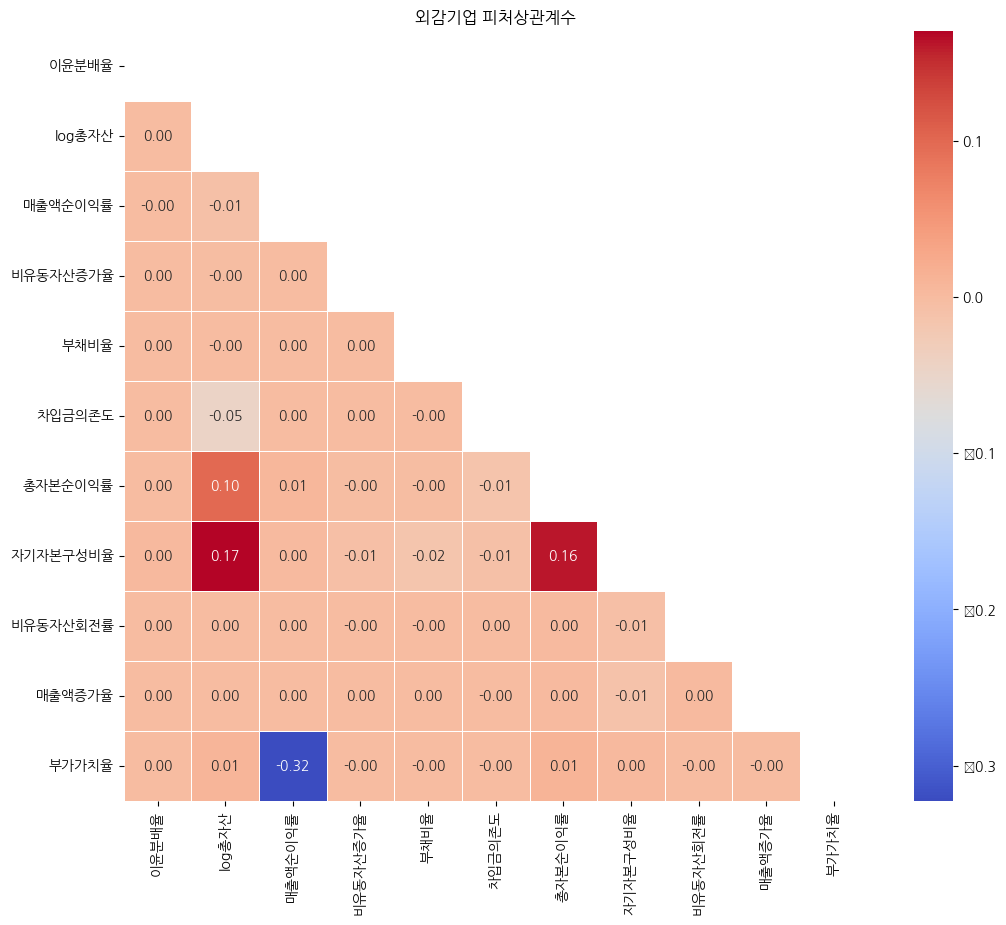

In [82]:
columns_of_interest = [
'이윤분배율', 'log총자산', '매출액순이익률', '비유동자산증가율', '부채비율', '차입금의존도', '총자본순이익률', '자기자본구성비율', '비유동자산회전률', '매출액증가율', '부가가치율'
]

# Filtering the dataframe for the selected columns
filtered_data = df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = filtered_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5,mask=mask)
plt.title('외감기업 피처상관계수')
plt.show()

In [321]:
X_train.describe()

,총자본증가율,유형자산증가율,유동자산증가율,순이익증가율,자기자본증가율,매출액증가율,비유동자산증가율,매출액순이익률,총자본순이익률,자기자본순이익률,...,비유동비율,영업이익대비이자보상배율,자본분배율,이윤분배율,총자본투자효율,부가가치율,log총자산,총부채대비영업현금흐름,매출액대비영업현금흐름,총자산대비영업현금흐름
count,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,...,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,1.016350e+05,101635.000000,1.016350e+05
mean,-8.738903e-20,3.146005e-19,-1.223446e-19,1.398225e-18,2.097337e-19,-7.690235e-19,5.418120e-19,2.062381e-18,-1.174509e-17,1.677869e-18,...,1.677869e-18,-6.292010e-19,1.328313e-18,8.564125e-19,-5.592898e-19,-5.243342e-19,2.425081e-15,-3.320783e-19,0.000000,-4.474318e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005,1.000005e+00
min,-7.011842e-02,-5.294462e-03,-4.585642e-03,-8.443023e-01,-3.378542e-02,-1.560884e-02,-5.677781e-03,-3.047774e+02,-2.701284e+02,-8.007226e+01,...,-2.345783e-02,-2.013837e+00,-2.130362e+02,-3.108348e+02,-3.173957e+02,-8.222886e+01,-1.320410e+01,-1.392235e+01,-10.169652,-6.034123e+01
25%,-1.085772e-02,-5.255123e-03,-3.795618e-03,-1.043335e-02,-1.135258e-02,-1.278255e-02,-5.099804e-03,5.102281e-03,-6.642468e-02,-2.703727e-02,...,-2.118061e-02,-3.848226e-03,2.513209e-03,6.967242e-03,3.353215e-03,-2.308438e-03,-6.462862e-01,-4.271710e-03,0.103837,-3.538364e-01
50%,-6.689063e-03,-5.253198e-03,-3.659984e-03,-9.929479e-03,-1.022858e-02,-1.246184e-02,-5.068912e-03,5.120153e-03,8.365417e-03,-9.327324e-03,...,-1.864378e-02,-3.826828e-03,3.188342e-02,9.109732e-03,3.413760e-03,-2.204550e-03,-1.979743e-01,-4.163567e-03,0.103843,-4.857497e-02
75%,-3.182122e-04,-5.249589e-03,-3.503529e-03,-9.180341e-03,-7.780914e-03,-1.203009e-02,-4.993046e-03,5.156339e-03,1.425476e-01,1.747139e-02,...,-1.405153e-02,-3.741236e-03,5.090744e-02,1.161693e-02,3.488758e-03,-2.031542e-03,4.641665e-01,-3.963246e-03,0.103851,3.469914e-01
max,3.183352e+02,3.003915e+02,3.186715e+02,2.462487e+02,3.013988e+02,2.283372e+02,3.069767e+02,1.006500e+01,1.321573e+01,2.715623e+02,...,2.398099e+02,3.182624e+02,1.091619e+00,1.225108e+01,1.604466e+00,2.941889e+02,7.256755e+00,1.263544e+02,2.756669,1.798027e+01
